# Exploratory Data Analysis

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [112]:
df_ecom_train_ds = pd.read_csv("ecommerce_train.csv")

In [113]:
df_ecom_train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               40000 non-null  int64  
 1   administrative           40000 non-null  int64  
 2   administrative_duration  40000 non-null  float64
 3   informational            40000 non-null  int64  
 4   informational_duration   40000 non-null  float64
 5   productrelated           40000 non-null  int64  
 6   productrelated_duration  40000 non-null  float64
 7   bouncerates              40000 non-null  float64
 8   exitrates                40000 non-null  float64
 9   pagevalues               40000 non-null  float64
 10  specialday               40000 non-null  float64
 11  month                    40000 non-null  object 
 12  operatingsystems         40000 non-null  object 
 13  browser                  40000 non-null  object 
 14  region                

In [115]:
df_ecom_train_ds.set_index('session_id',inplace=True)

array([[<AxesSubplot:title={'center':'administrative'}>,
        <AxesSubplot:title={'center':'administrative_duration'}>,
        <AxesSubplot:title={'center':'informational'}>],
       [<AxesSubplot:title={'center':'informational_duration'}>,
        <AxesSubplot:title={'center':'productrelated'}>,
        <AxesSubplot:title={'center':'productrelated_duration'}>],
       [<AxesSubplot:title={'center':'bouncerates'}>,
        <AxesSubplot:title={'center':'exitrates'}>,
        <AxesSubplot:title={'center':'pagevalues'}>],
       [<AxesSubplot:title={'center':'specialday'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'revenue'}>]], dtype=object)

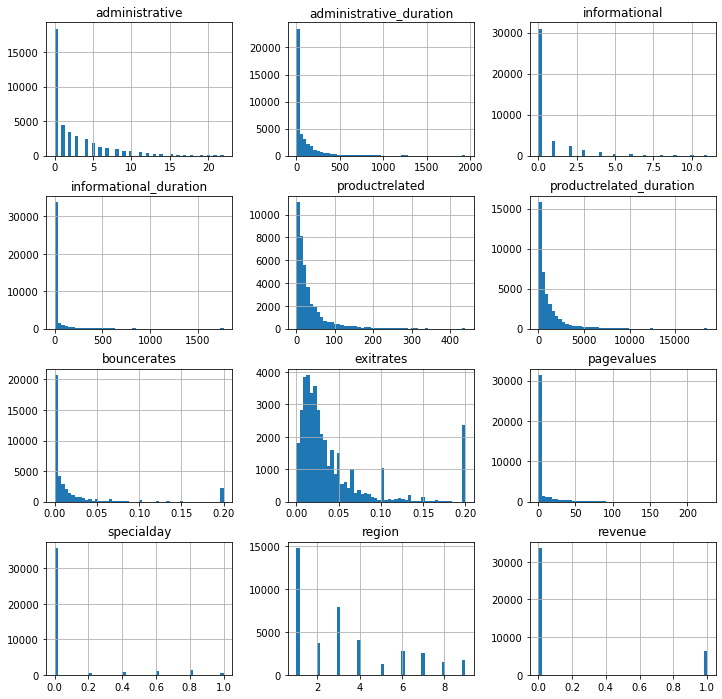

In [116]:
df_ecom_train_ds.hist(bins=50, figsize=(12,12))

In [117]:
#########################################################################################
########################      Descriptive Statistics      ###############################
#########################################################################################
df_ecom_train_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
administrative,40000.0,2.544150,3.667252,0.0,0.000000,1.000000,4.000000,22.000000
administrative_duration,40000.0,89.794383,182.964645,0.0,0.000000,11.200000,110.154167,1946.000000
informational,40000.0,0.555225,1.332627,0.0,0.000000,0.000000,0.000000,11.000000
informational_duration,40000.0,40.977236,153.114387,0.0,0.000000,0.000000,0.000000,1767.666667
productrelated,40000.0,34.026975,46.798102,0.0,7.000000,19.000000,41.000000,440.000000
productrelated_duration,40000.0,1148.105672,1666.181462,0.0,183.883333,560.075000,1420.536667,18504.126210
bouncerates,40000.0,0.021969,0.048533,0.0,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042307,0.048633,0.0,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.494963,17.710646,0.0,0.000000,0.000000,0.000000,226.677702
specialday,40000.0,0.063553,0.199463,0.0,0.000000,0.000000,0.000000,1.000000


In [118]:
ecom_corr_matrix = df_ecom_train_ds.corr()

In [119]:
ecom_corr_matrix["revenue"].sort_values(ascending=False)

revenue                    1.000000
pagevalues                 0.507821
productrelated             0.184168
productrelated_duration    0.180542
administrative             0.153079
informational              0.111732
administrative_duration    0.108333
informational_duration     0.081428
weekend                    0.020203
region                    -0.010116
specialday                -0.078758
bouncerates               -0.145773
exitrates                 -0.193799
Name: revenue, dtype: float64

In [122]:
print("Number of records in data1 : ",df_ecom_train_ds.shape[0])
print("Number of features in data1 : ",df_ecom_train_ds.shape[1])
# print("Number of unique session_id in data1 : ", df_ecom_train_ds['session_id'].nunique())


Number of records in data1 :  40000
Number of features in data1 :  18


In [123]:
df_ecom_train_ds.isnull().sum(axis = 1).sum()

0

## Isolating the Categorical & Continuous variables

In [124]:
# isolating the continuous variables 
num_var_list = list(df_ecom_train_ds.select_dtypes(exclude=['object']).drop(['revenue'],axis = 1).columns.values)
num_var_list

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'region',
 'weekend']

In [125]:
# isolating the categorical variables 
cat_var_list = list(df_ecom_train_ds.select_dtypes(include=['object']).columns.values)
cat_var_list

['month', 'operatingsystems', 'browser', 'traffictype', 'visitortype']

In [126]:
def cat_plots(idat, col, target = "revenue"):
    print("Countplot for ",col, " split by ", target)
    print("\n")
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=df_ecom_train_ds, hue=target)
    plt.show()

Countplot for  month  split by  revenue




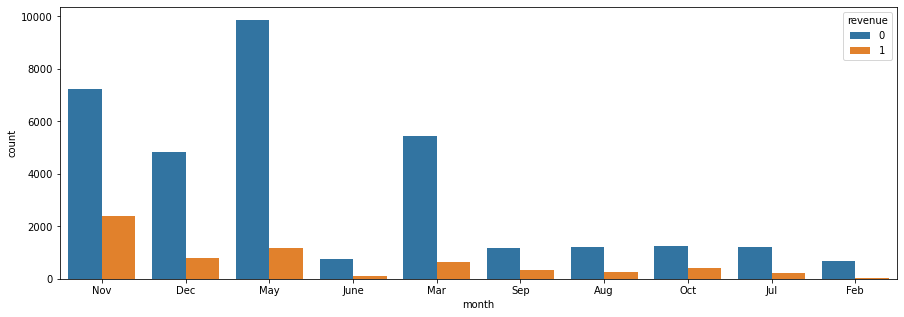

Countplot for  operatingsystems  split by  revenue




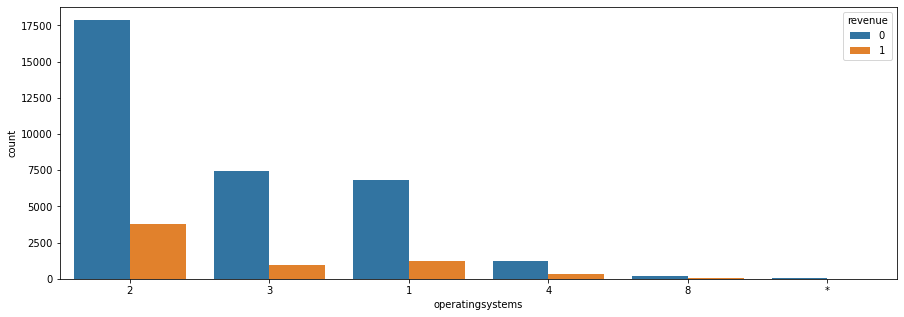

Countplot for  browser  split by  revenue




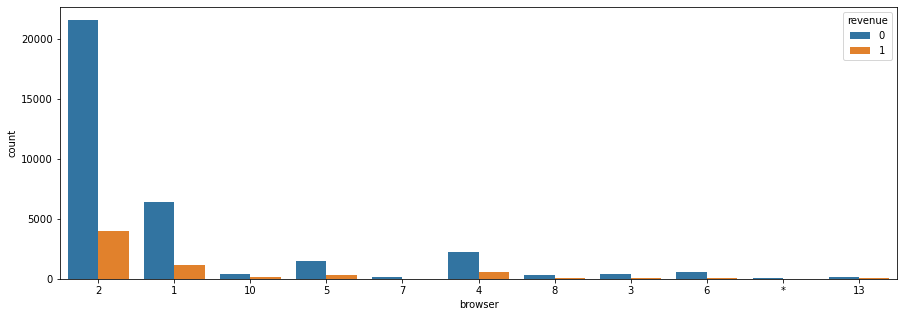

Countplot for  traffictype  split by  revenue




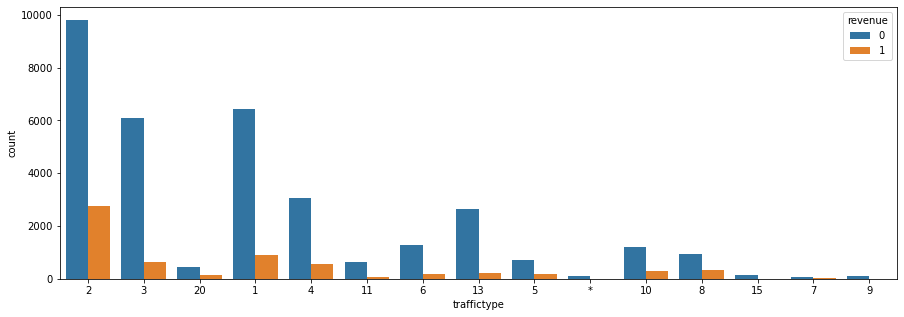

Countplot for  visitortype  split by  revenue




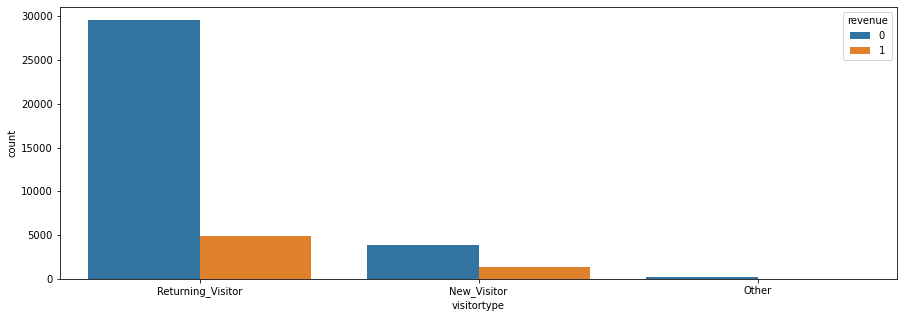

In [127]:
for cl in cat_var_list:
    cat_plots(df_ecom_train_ds,cl,"revenue")

In [128]:
def cont_plots(data, col, target):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0],kde_kws={'bw':0.15}).set_title("Distribution plot")
    sns.boxplot(x=target, y=col, data=df_ecom_train_ds).set_title("Box Plot distribution")
    plt.show()

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


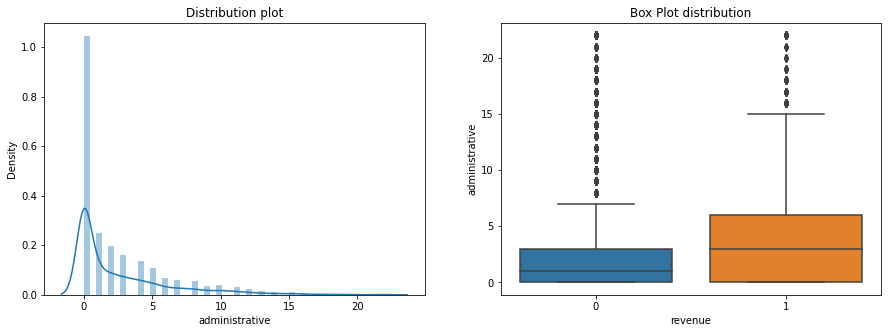

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


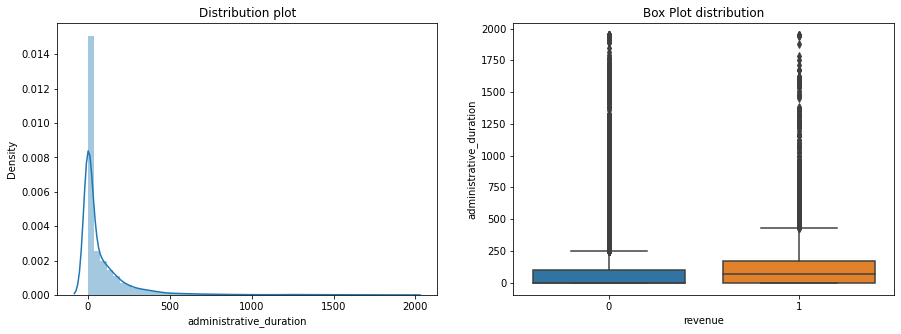

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


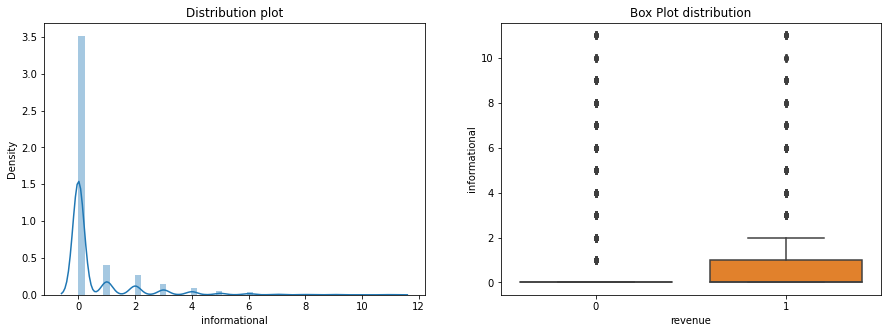

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


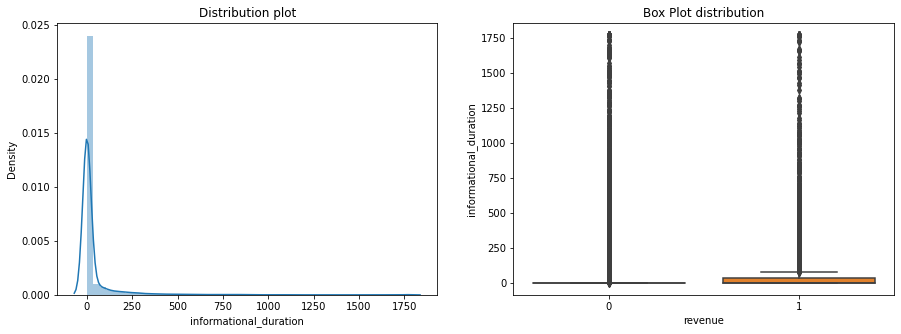

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


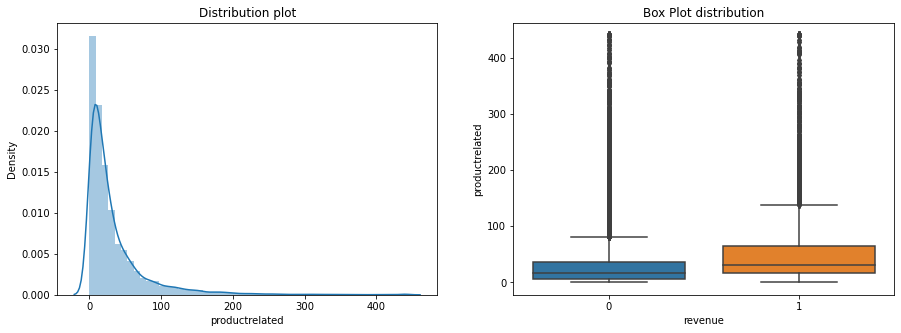

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


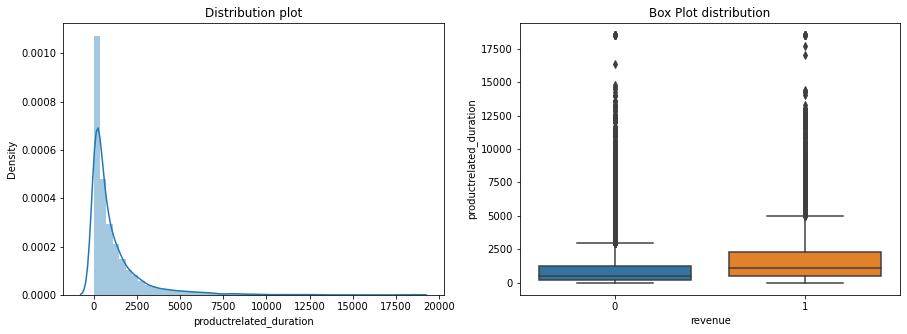

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


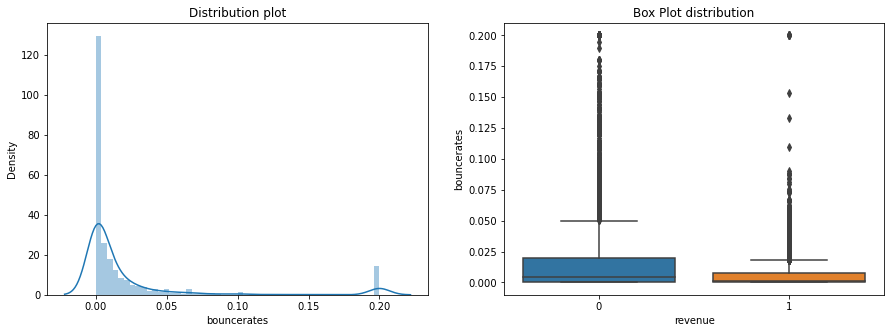

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


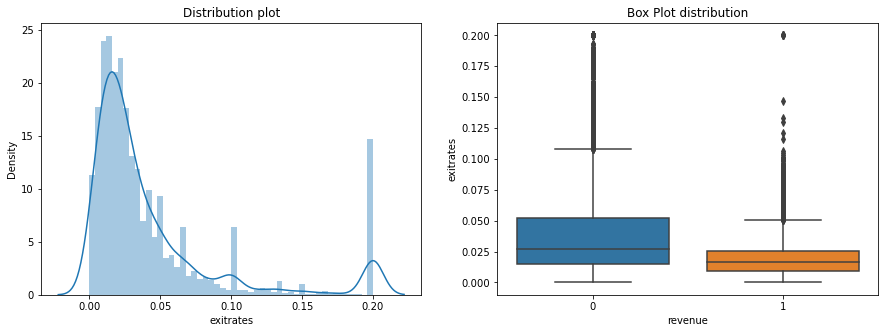

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


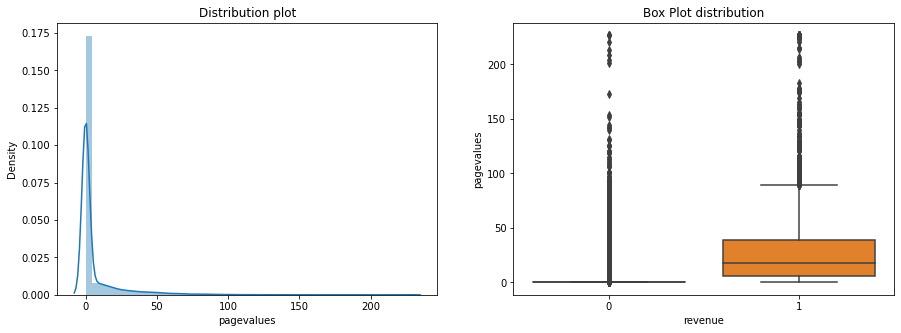

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


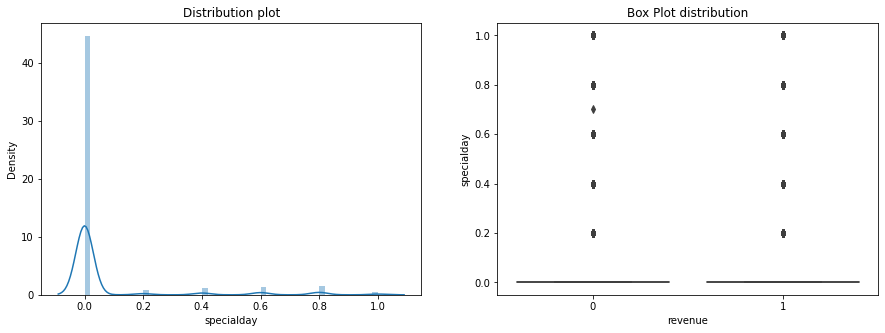

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


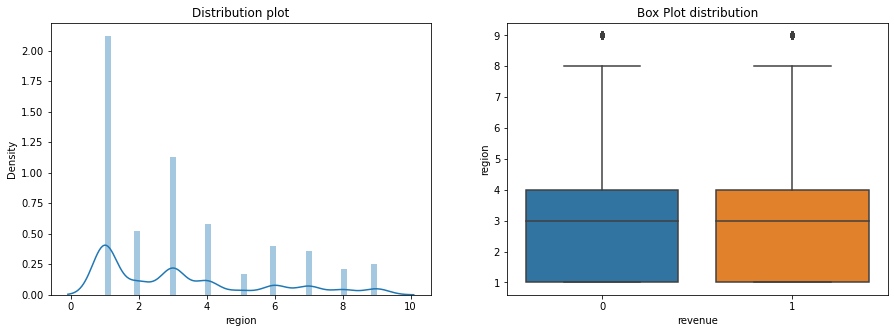

C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish_Bhoge\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

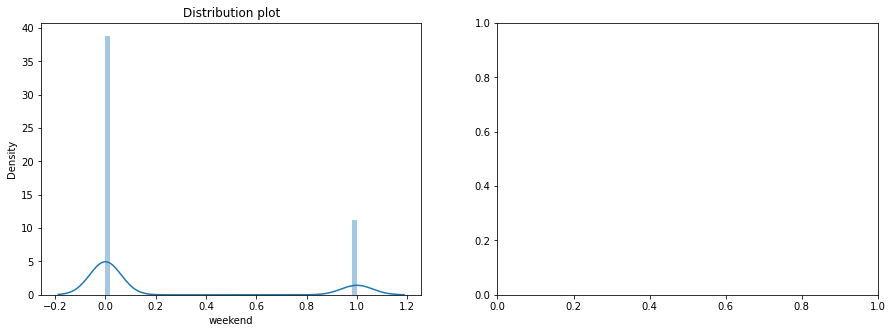

In [129]:
for cl in num_var_list:
    cont_plots(df_ecom_train_ds, cl, "revenue")

## Correlation Analysis

<AxesSubplot:>

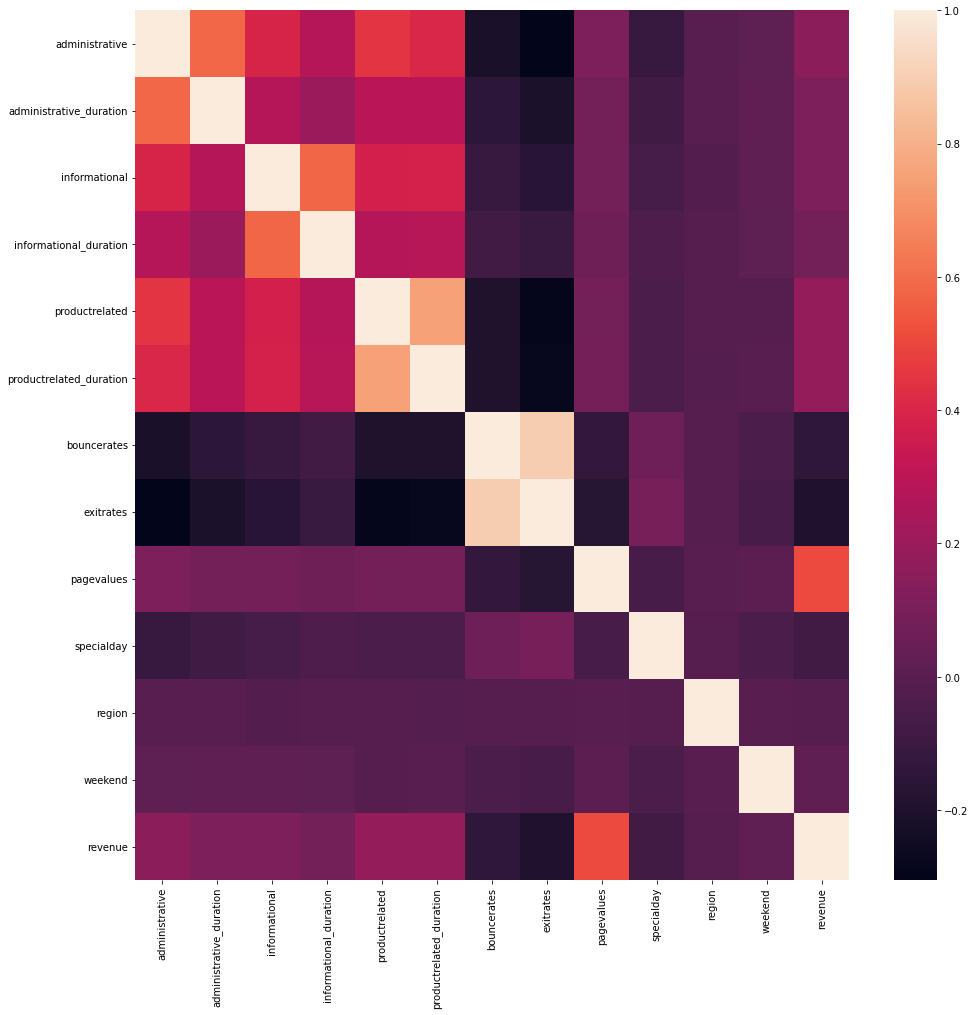

In [130]:
### Correlation heat map
f, ax = plt.subplots(figsize=(16,16))
corr = df_ecom_train_ds.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Missing Value Treatment

In [133]:
## Imputing special values to 0s
df_ecom_train_ds_2 = df_ecom_train_ds.copy()
for col in num_var_list:
    df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',0,df_ecom_train_ds[col])

In [154]:
## Imputing special values to Mode
df_ecom_train_ds_2 = df_ecom_train_ds.copy()
for col in cat_var_list:
    if col == 'operatingsystems':
        df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',df_ecom_train_ds[col].mode(),df_ecom_train_ds[col])
    if col == 'browser':
        df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',df_ecom_train_ds[col].mode(),df_ecom_train_ds[col])
    if col == 'traffictype':
        df_ecom_train_ds_2[col]=np.where(df_ecom_train_ds[col] == '*',df_ecom_train_ds[col].mode(),df_ecom_train_ds[col])

In [155]:
df_ecom_train_ds_2[num_var_list].describe().T

,count,mean,std,min,25%,50%,75%,max
administrative,40000.0,2.544150,3.667252,0.0,0.000000,1.000000,4.000000,22.000000
administrative_duration,40000.0,89.794383,182.964645,0.0,0.000000,11.200000,110.154167,1946.000000
informational,40000.0,0.555225,1.332627,0.0,0.000000,0.000000,0.000000,11.000000
informational_duration,40000.0,40.977236,153.114387,0.0,0.000000,0.000000,0.000000,1767.666667
productrelated,40000.0,34.026975,46.798102,0.0,7.000000,19.000000,41.000000,440.000000
productrelated_duration,40000.0,1148.105672,1666.181462,0.0,183.883333,560.075000,1420.536667,18504.126210
bouncerates,40000.0,0.021969,0.048533,0.0,0.000000,0.003304,0.016667,0.200000
exitrates,40000.0,0.042307,0.048633,0.0,0.013389,0.025000,0.050000,0.200000
pagevalues,40000.0,6.494963,17.710646,0.0,0.000000,0.000000,0.000000,226.677702
specialday,40000.0,0.063553,0.199463,0.0,0.000000,0.000000,0.000000,1.000000


## Outlier Treatment

In [162]:
df_ecom_train_ds_3 = df_ecom_train_ds_2.copy()

for col in num_var_list: 
    sorted(df_ecom_train_ds_3[col])
#     q1, q3 = np.percentile(full_data_3[col], [25, 75])
#     iqr = q3 -q1

#     lower_bound = q1 -(1.5 * iqr) 
#     upper_bound = q3 +(1.5 * iqr)
    #p1,p99 = np.percentile(df_ecom_train_ds_3[col], [1, 99])
    
 
    #lower_bound = p1
    #upper_bound = p99

    #df_ecom_train_ds_3[col] = np.where(df_ecom_train_ds_3[col] < lower_bound, lower_bound, df_ecom_train_ds_3[col])
    #df_ecom_train_ds_3[col] = np.where(df_ecom_train_ds_3[col] > upper_bound, upper_bound, df_ecom_train_ds_3[col])

In [163]:
df_ecom_train_ds_3[col]

session_id
139957    False
496587    False
440268    False
294672     True
497475    False
          ...  
264884    False
238369    False
370016    False
211469    False
314094    False
Name: weekend, Length: 40000, dtype: bool